### 1) Perform any data cleaning and exploratory analysis that you feel is appropriate. Summarize your approach in a few sentences and report some interesting facts about the population in the data.

 **Data Cleaning** <br>
 **Missing values**: <br>
   Removed columns with more than 70% missing values, so the following columns were removed: verification_status_joint and mths_since_last_major_derog. <br>
   
 **Creating new features**: <br>
    **emp_length**: Employment length, in its current form, couldn't be used as a feature, so created a new feature by deriving only numerical values<br>
    **total_monthly_debt**: Monthly debt is an important factor that may influence loan default, so created this feature by multiplying ratio of dti with monthly income<br>
    **age_credit**: The age of credit history is an important factor that may influence loan default, so created this feature by subtracting earliest_cr_line year from apply_year <br>
    **log_annual_inc**: annual_inc has an extremly right skewed normal distribution, so used log transformation to convert it to normal distribution. Additionally, this helps in dealing with extreme outliers.<br>
    **log_revol_bal**: revol_bal has an extremly right skewed normal distribution, so used log transformation to convert it to normal distribution. Additionally, this helps in dealing with extreme outliers.  <br>
    
**Data Imputation**: <br>
- Used median imputation on numeric predictors like annual_income, age_credit, emp_length as some of them had right skewed normal distribution

**Interesting Facts**
- 31% of loans associated with small business were defaulted. However, only 14% of loans for cars, education and major purchases were defaulted.
- Tennessee and Mississippi had the highest default loan rate of 28%. However, Nebraska and Wyoming had the lowest  default loan rate of 11%. 
- People who defaulted seems to have lower median annual income than people who paid off their loans.  
- People who defaulted have higher mean dti than people who paid off their loans.
- 24% of loans that were defaulted had the home ownership of type rental compared to 19% of type home mortages. 

### 2) Build a predictive model to help us determine who is likely to default if they are extended a loan. Discuss your overall approach, with a focus on data preparation, classifier selection, and model evaluation.

**Data preparation**: 
- Numerical features used: log_annual_inc, dti, log_revol_bal, total_monthly_debt, emp_length, age_credit
- Categorical features used: home_ownership, verification_status, purpose <br><br>
  Categorical features were dummy coded and numerical features were standarized (mean = 0, sd = 1)
  
**Classifier Selection**
Since this is a classification problem, I used classifiers such as -- 
- Logistic Regression: Used it as a base model
- Random Forest: The random forest is an ensemble technique that handles multi-collinearity or correlated features. This model is not sensitive to outliers. 
- Gradient Boosted Trees: Boosting improves the quality of fit of each base learner, hence in every iteration loss is minimized.  

**Model Evaluation** <BR><BR>
**Choosing the right metric**: 

Given that this is an imbalanced class problem (78% not default and only 22% default), accuracy as a metric could be misleading. A classifier can predict majority class, which means that while the accuracy can be high, the classifier is still ineffective. Therefore, I used AUC (area under the curve) as a metric, which measures the model ability of distinguishing between the classes. 

**Training, Validation and Test data**: 

I divided 80% of the data to training set and remaining 20% to testing set. Furthermore, on training set, I used 5-Fold Stratified cross-validation where in each fold, model was trained on K-1 fold and tested on the remaining fold; to check the model performance on validation set before applying to test data.

**Classifiers and Performance**:

- Using Logistic Regression, AUC on training data is 0.63, AUC on validation data is also around 0.63 and AUC on test data is 0.62. The model is clearly underfitting (low AUC on training data). This necessitates the need to collect more expressive features that can help with class separation. <br>
- Using Random Forest, AUC on training data is 0.99, AUC on validation data is around 0.58 and AUC on test data is 0.58. The model is overfitting (high AUC on training data but not on validation set), so I used top few features from the feature importance set, but that didn't improve the model. Additionally, I used **resampling techniques like over-sampling and SMOTE** to check if the performance increases by adding more data but that didn't improve the model either. So, one suggestion to the data team could be to collect more features like actual loan amount. This can help the model learn to generalize it to unseen data.
- Using Gradient Boosted Trees, AUC on train data is 0.65, AUC on validation data is also around 0.63 and AUC on test data is 0.62. Similar to Logistic Regression, the model is underfitting and necessitates the need to collect more expressive features. 

**Few suggestions that may improve model performance**: 
- By using grid search to find optimal parameters can further improve the model performace. 
- By adding address as a feature can also add to the predictive power of the model. Since there are too many addresses, so addresses can either be divided by regions like West, Southwest, Northeast, Southeast and Midwest to form a categorical region feature. Another way is to create a feature by including only those states that have highest and lowest loan default probability.  
- Use a better imputation method than median for null values. Perhaps KNN

### 3) Now that you have trained a model, it is time to put it in production (a web app where a customer can apply and get an immediate loan approval or rejection decision). How would you come up with an appropriate cut off that separates those approved and those rejected? We are not necessarily expecting code for this section, just an analytical explanation for how you would solve this problem in a real business setting.

The cutoff has to be chosen in such a way that a business does not loses potential customers but also maximizes 
profit, i.e. based on historical data, the model should account for this balance, learn from the new behavior and be reactive to ever changing scenarios. It also depends on the business objectives at a given time. If the business is in a phase of expanding customer base, then the cutoff can be set to lower values such that more loans can be granted. However, if the business strategy is based on pure profit, then cutoff value can be set high to minimize the loss on loan default. Or, if the business wants to finance 20% of new loans, then a cutoff value can be chosen based on 80% quantile in the probability distribution. In summary, Profit/Loss curve can be used in combination with business needs to determine optimal cut-off value.  

### Reading Data

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# read data
data = pd.read_csv('train_data.csv', encoding='latin-1')

In [121]:
data.columns

Index(['id', 'loan_status', 'mths_since_last_major_derog', 'revol_bal',
       'purpose', 'addr_state', 'title', 'home_ownership', 'application_type',
       'verification_status_joint', 'earliest_cr_line', 'apply_date',
       'verification_status', 'emp_length', 'dti', 'emp_title', 'annual_inc'],
      dtype='object')

In [122]:
data.dtypes

id                               int64
loan_status                     object
mths_since_last_major_derog    float64
revol_bal                        int64
purpose                         object
addr_state                      object
title                           object
home_ownership                  object
application_type                object
verification_status_joint       object
earliest_cr_line                object
apply_date                      object
verification_status             object
emp_length                      object
dti                            float64
emp_title                       object
annual_inc                     float64
dtype: object

In [123]:
data.head()

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc
0,63480419,Current,NaN,15954,debt_consolidation,KS,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,8/5/2019,11/15/2019,Not Verified,5 years,24.85,Branch Office Administrator,62000.0
1,51386490,Current,NaN,73814,debt_consolidation,MD,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,9/1/1983,6/15/2019,Verified,10+ years,26.38,IIntelligence Analyst,113000.0
2,13567696,Current,NaN,30013,major_purchase,TX,Major purchase,OWN,INDIVIDUAL,NaN,12/1/1999,4/14/2019,Not Verified,10+ years,14.41,Global Service Delivery Lead,180000.0
3,22252931,Fully Paid,NaN,10768,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,9/1/2019,7/14/2019,Not Verified,10+ years,24.31,Operations Manager,66000.0
4,6539569,Fully Paid,NaN,35551,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,12/1/1992,8/13/2019,Verified,2 years,1.70,Coram Specialty Infusion,110000.0


### Data Preprocessing

### Dealing with missing values -- Remove columns with >70% missing values

In [124]:
# Find out % of missing values in columns
(data.isnull().sum()/data.shape[0])*100

id                              0.0000
loan_status                     0.0000
mths_since_last_major_derog    75.1275
revol_bal                       0.0000
purpose                         0.0000
addr_state                      0.0000
title                           0.0180
home_ownership                  0.0000
application_type                0.0000
verification_status_joint      99.9445
earliest_cr_line                0.0055
apply_date                      0.0000
verification_status             0.0000
emp_length                      5.1325
dti                             0.0000
emp_title                       5.8965
annual_inc                      0.0010
dtype: float64

In [74]:
# Remove verification_status_joint and mths_since_last_major_derog as more than 70% of its values are null
data.drop(['verification_status_joint'], axis=1, inplace=True)
data.drop(['mths_since_last_major_derog'], axis=1, inplace=True)

In [126]:
#percentage of rows with missing values
# if rows don't belone to Default loan category, we can drop them else will just impute them 
(data.shape[0] - data.dropna().shape[0])*100/data.shape[0]

5.9615

In [132]:
data.isnull().sum()

id                        0
loan_status               0
revol_bal                 0
purpose                   0
addr_state                0
title                     3
home_ownership            0
application_type          0
earliest_cr_line         11
apply_date                0
verification_status       0
emp_length             2454
dti                       0
emp_title              3408
annual_inc                2
dtype: int64

### Feature Engineering

#### 1) loan_status

In [75]:
# Convert loan_status into two categories 'Default' and 'Not Default'
# and drop 'current'
# Based on the case study, "A default is identified by a loan status listed as in default, over 30 days late, or charged
# off"

default_vals = ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']
full_paid_vals = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

def loan_type(status):
    if status in default_vals:
        return 'Default'
    elif status in full_paid_vals:
        return "Fully Paid"
    else:
        return status
    
data['loan_status'] = data['loan_status'].apply(loan_type)
data['loan_status'].value_counts()


# limit data to these categories only
data = data.loc[data.loan_status.isin(['Default', 'Fully Paid'])]

In [54]:
len(data) == len(data.id.value_counts()) # every id is unique 

True

**2) Emp_length**

In [76]:
# strip integers from emp_length

data.loc[data.emp_length == '< 1 year', 'emp_length'] = '0 year'
data['emp_length'] = data.emp_length.str.extract('(\d+)')
# fill na by median value
data['emp_length'].fillna(data['emp_length'].median(), inplace=True)
data.emp_length = data.emp_length.astype('int64')

# How emp_length is related ro Default loan category?
data.groupby('emp_length')['loan_status'].value_counts(normalize=True).loc[:, 'Default'].sort_values()

emp_length
2     0.198841
5     0.205092
4     0.208279
3     0.214747
10    0.216592
1     0.223907
8     0.224607
7     0.228349
0     0.228743
9     0.233715
6     0.251698
Name: loan_status, dtype: float64

**3) purpose**

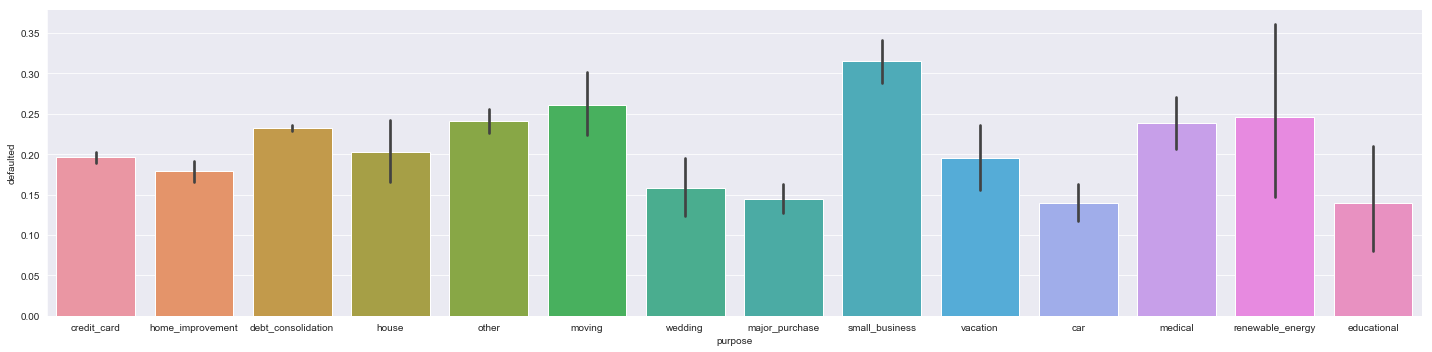

In [77]:
data.purpose.value_counts()
data.groupby('loan_status')['purpose'].describe()
data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Default'].sort_values()
data['defaulted'] = 0
data.loc[data.loan_status == 'Default', 'defaulted'] = 1
sns.catplot(x='purpose', y='defaulted', kind='bar', data = data, aspect=4);

Interesting that 31% of loans associated with small business were defaulted. 
But only 14% of loans for car, educational and major purchase were defaulted

**4) addr_state**

In [79]:
data.addr_state.value_counts()
data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:, 'Default'].sort_values()

addr_state
NE    0.111111
WY    0.121429
DC    0.149038
VT    0.163462
CO    0.174453
DE    0.175532
NH    0.183824
CT    0.184939
SC    0.192469
KS    0.193939
WV    0.195035
TX    0.199914
OR    0.201235
MT    0.202381
IL    0.203405
MA    0.203844
KY    0.205224
CA    0.206119
RI    0.207031
GA    0.208948
WA    0.209072
AK    0.209150
AZ    0.211398
MN    0.216891
MD    0.218407
PA    0.220896
UT    0.221311
SD    0.223881
MO    0.224026
OH    0.226016
LA    0.226542
AR    0.226545
NJ    0.228890
WI    0.236000
MI    0.236287
NC    0.237015
NY    0.237705
HI    0.239782
VA    0.240021
OK    0.245931
AL    0.249354
FL    0.254368
NM    0.267516
NV    0.268707
IN    0.269051
MS    0.288660
TN    0.300509
Name: loan_status, dtype: float64

Tennessee and Mississippi are the states that have higher default rates (~28%) than Nebraska, Wyoming
where default rate is ~11%

**5) Emp_title**

In [7]:
data.emp_title.value_counts() ## too many values

Manager                                  489
Teacher                                  431
Registered Nurse                         202
Supervisor                               201
RN                                       176
Sales                                    173
Project Manager                          159
manager                                  157
Driver                                   155
Office Manager                           138
Director                                 132
Engineer                                 118
Owner                                    113
driver                                   111
teacher                                  107
US Army                                  103
Vice President                           102
General Manager                          100
Operations Manager                        98
Administrative Assistant                  91
Executive Assistant                       89
Account Manager                           86
Bank of Am

**6) Annual Income**

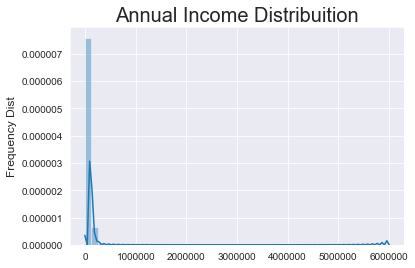

In [80]:
sns.set_style('darkgrid')
g = sns.distplot(data.annual_inc.dropna())
#g = sns.distplot(data.annual_inc[data.annual_inc <= 75000])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Annual Income Distribuition", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Annual Income by Loan status')

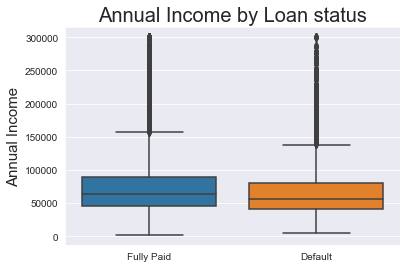

In [81]:
sns.set_style('darkgrid')
g1 = sns.boxplot(x="loan_status", y="annual_inc", data=data[(data.annual_inc <= 300000)])
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Annual Income", fontsize=15)
g1.set_title("Annual Income by Loan status", fontsize=20)

People who default seems to have lower median annual income than people who paid off their loan 

In [82]:
# data imputation

data.annual_inc.fillna(data.annual_inc.median(), inplace=True)

**7) Log Annual Income**

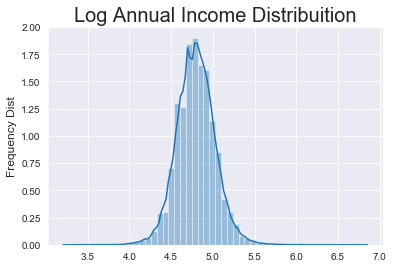

In [83]:
import numpy as np

data['log_annual_inc'] = data['annual_inc'].apply(lambda x: np.log10(x+1))
sns.set_style('darkgrid')
g = sns.distplot(data.log_annual_inc)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Log Annual Income Distribuition", fontsize=20)
plt.show()

**8) dti**

In [84]:
data.dti.describe()
data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Default,13344.0,18.731147,8.069019,0.0,12.86,18.68,24.43,39.98
Fully Paid,47289.0,16.084241,7.691659,0.0,10.34,15.70,21.46,39.99


People who default have higher mean dti than people who paid off their loan

**9) Revol_bal**

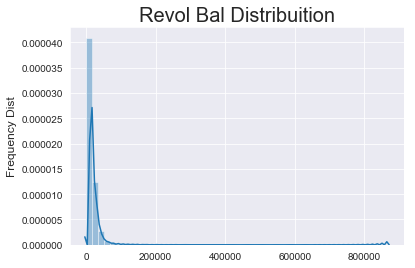

In [85]:
sns.set_style('darkgrid')
g = sns.distplot(data.revol_bal)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Revol Bal Distribuition", fontsize=20)
plt.show()

**10) Log Revol Bal**

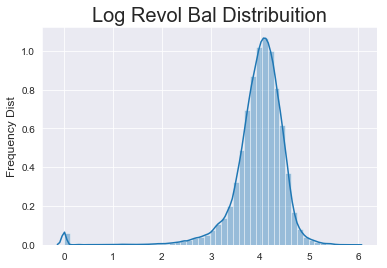

In [86]:
data['log_revol_bal'] = data['revol_bal'].apply(lambda x: np.log10(x+1))
sns.set_style('darkgrid')
g = sns.distplot(data.log_revol_bal)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Log Revol Bal Distribuition", fontsize=20)
plt.show()

**11) total_monthly_debt and age_credit**

In [87]:
# create new variables 

data['total_monthly_debt'] = round((data['dti']/100)*(data['annual_inc']/12), 0)

data['age_credit'] = pd.to_datetime(data['apply_date'], format = '%m/%d/%Y').dt.year - pd.to_datetime(data['earliest_cr_line'], format = '%m/%d/%Y').dt.year


# Imputing by median for age_credit
data.age_credit.fillna(data.age_credit.median(), inplace=True)

**12) home_ownership**

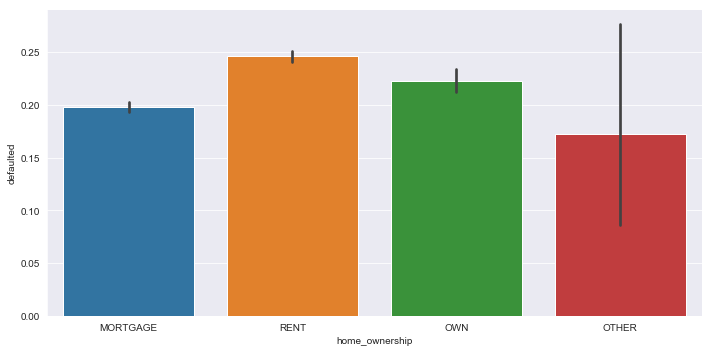

In [92]:
# home ownership combine 'other', 'none', any to just 'other'
data.loc[data.home_ownership.isin(['OTHER', 'ANY', 'NONE']), 'home_ownership'] = 'OTHER'
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:, 'Default'].sort_values()
sns.catplot(x='home_ownership', y='defaulted', kind='bar', data = data, aspect=2);

24% of people who default on loan have rental homes compared to 19% of people who paid mortages on their homes

### Modeling

In [93]:
data.loan_status.value_counts()/len(data)

Fully Paid    0.779922
Default       0.220078
Name: loan_status, dtype: float64

**Prepare X**

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


#data.columns
dummy_vars = ['home_ownership', 'verification_status', 'purpose']
features_to_scale = ['log_revol_bal', 'emp_length', 'dti', 'log_annual_inc','total_monthly_debt', 'age_credit']
    

X = pd.get_dummies(data[features_to_scale + dummy_vars], columns=dummy_vars)

# Scaling
scaler=StandardScaler()
X[features_to_scale]=scaler.fit_transform(X[features_to_scale])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [95]:
X.head()

,log_revol_bal,emp_length,dti,log_annual_inc,total_monthly_debt,age_credit,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
3,0.112809,1.175597,0.973277,0.103225,0.634895,-1.188641,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.026511,-1.078529,-1.905844,1.078582,-1.251372,0.869673,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.132539,0.048534,0.406621,0.858121,1.090091,0.336036,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.764374,1.175597,0.425722,-0.244893,-0.035919,-1.188641,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,0.482944,1.175597,0.011872,0.256056,0.095049,0.564737,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Prepare Y**

In [96]:
mask = (data.loan_status == 'Default')
data['target'] = 0 
data.loc[mask,'target'] = 1
data.target.value_counts()/len(data)

y = data['target']
y.values

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pylab as plt
%matplotlib inline

def model_validation(classifier, X, y, n_folds=5):
    """Validate the model by cross validation"""
    all_tpr = []
    all_fpr = []
    all_roc_auc = []
    skf = StratifiedKFold(n_splits=n_folds)
    for i, (train, test) in enumerate(skf.split(X, y)):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area under the curve
        fpr, tpr, thresholds = metrics.roc_curve(y[test], probas_[:, 1], pos_label=1)
        all_tpr.append(tpr)
        all_fpr.append(fpr)
        roc_auc = metrics.auc(fpr, tpr)
        print("AUC for fold ", (i, roc_auc))
        all_roc_auc.append(roc_auc)

    # plot ROC curve for all folds
    plot_ROC_curve(all_fpr, all_tpr, all_roc_auc, n_folds)
    
def plot_ROC_curve(all_fpr, all_tpr, all_roc_auc, n_folds):
    """Plot the ROC curve"""

    for fold in range(n_folds):
        plt.plot(all_fpr[fold], all_tpr[fold], lw=1, label='ROC fold %d (area = %0.2f)' % (fold, all_roc_auc[fold]))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for cv folds')
    plt.legend(loc="lower right")

**Train-Test Split** (Stratified)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Training model 

**Logistic Regression**


In [99]:
# train Logistic Regression
lr = LogisticRegression(solver = 'lbfgs', max_iter= 2000) 
lr.fit(np.array(X_train), y_train.values) 
y_score = lr.predict_proba(np.array(X_train))[:,1]
roc_auc = metrics.roc_auc_score(y_train.values, y_score)
print("AUC for training data using Logistic Regression ",roc_auc)


print(lr.coef_)

AUC for training data using Logistic Regression  0.6319017159824009
[[ 0.06151332  0.03959344  0.28302591 -0.17607505 -0.0148843  -0.07502288
  -0.03072296 -0.19754275  0.00549788  0.19258502 -0.27939707  0.10983858
   0.13937569 -0.33609616 -0.1706214   0.03772231 -0.52812624 -0.01688143
   0.18026868 -0.33167633  0.21399247  0.40335675  0.19869714  0.3030902
   0.63240858 -0.16523596 -0.45108141]]


AUC for fold  (0, 0.6204204191192559)
AUC for fold  (1, 0.6311626461533509)
AUC for fold  (2, 0.641256923460743)
AUC for fold  (3, 0.6321870738128977)
AUC for fold  (4, 0.6245987689286658)


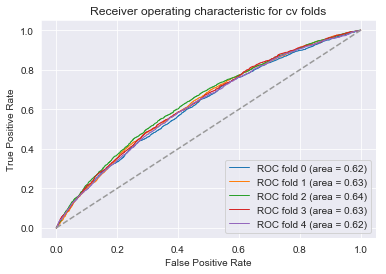

In [100]:
# Validation AUC
model_validation(LogisticRegression(solver = 'lbfgs', max_iter= 2000), X=np.array(X_train), y=y_train.values)

In [101]:
# test set
y_score = lr.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Logistic Regression ",roc_auc)


AUC for test data using Logistic Regression  0.6178466753411447


**Random Forest** 

In [106]:
# train data
rf = RandomForestClassifier(n_estimators = 40) 
rf.fit(np.array(X_train), y_train.values) 
y_score = rf.predict_proba(np.array(X_train))[:,1]
roc_auc = metrics.roc_auc_score(y_train.values, y_score)
print("AUC for training data is ",roc_auc)
    
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

AUC for training data is  0.9999999739999852


,importance
dti,0.195176
log_revol_bal,0.187322
total_monthly_debt,0.182946
log_annual_inc,0.157878
age_credit,0.090402
emp_length,0.084505
purpose_debt_consolidation,0.012145
purpose_credit_card,0.009521
verification_status_Verified,0.008067
verification_status_Source Verified,0.007790


In [105]:
# The model is clearly overfitting on training data, so let's train the model with few top features

cols_of_interest = ['dti', 'log_revol_bal' ]
# 'total_monthly_debt', 'log_annual_inc'

rf_overfit = RandomForestClassifier(n_estimators = 40) 
rf_overfit.fit(np.array(X_train[cols_of_interest]), y_train.values) 
y_score = rf_overfit.predict_proba(np.array(X_train[cols_of_interest]))[:,1]
roc_auc = metrics.roc_auc_score(y_train.values, y_score)
print("AUC for training data is ",roc_auc)



AUC for training data is  0.9998616254453973


AUC for fold  (0, 0.5819646752864108)
AUC for fold  (1, 0.5966216421176705)
AUC for fold  (2, 0.594022871950876)
AUC for fold  (3, 0.5885890657142983)
AUC for fold  (4, 0.5832209731567515)


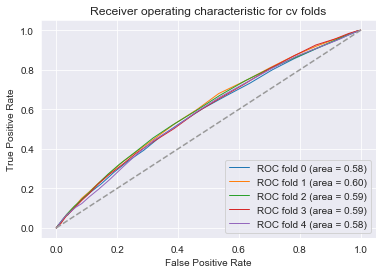

In [104]:
# Validation AUC
model_validation(RandomForestClassifier(n_estimators = 40), X=np.array(X_train), y=y_train.values)

In [107]:
# Test AUC
y_score = rf.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Random Forest is ",roc_auc)


AUC for test data using Random Forest is  0.5809988091145559


**Gradient Boosted Trees**

In [109]:
gb = GradientBoostingClassifier()
gb.fit(np.array(X_train), y_train.values) 
y_score = gb.predict_proba(np.array(X_train))[:,1]
roc_auc = metrics.roc_auc_score(y_train.values, y_score)
print("AUC for training data is ",roc_auc)
    

AUC for training data is  0.6536354675362888


AUC for fold  (0, 0.6219737557600193)
AUC for fold  (1, 0.6335573417625133)
AUC for fold  (2, 0.6458293016768595)
AUC for fold  (3, 0.6359395941785666)
AUC for fold  (4, 0.625339881795856)


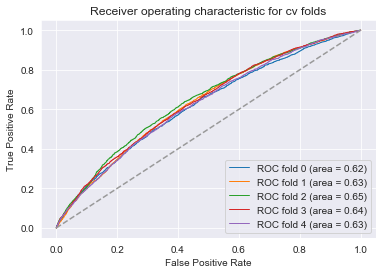

In [233]:
# Validation AUC
model_validation(GradientBoostingClassifier(), X=np.array(X_train), y=y_train.values)

In [110]:
# Test AUC
y_score = gb.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Gradient Boosted Trees is ",roc_auc)

AUC for test data using Gradient Boosted Trees is  0.6215997154424748


## Undersampling

In [111]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,log_revol_bal,emp_length,dti,log_annual_inc,total_monthly_debt,age_credit,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,target
123523,0.702494,1.175597,0.675305,-0.244893,0.107827,1.174608,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10202,0.558919,-0.233232,-0.112920,-0.725983,-0.602918,0.793439,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38144,-0.396799,0.612066,-0.000862,-0.163342,-0.227581,-1.188641,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6630,-0.376332,-0.796763,-0.254265,-0.244893,-0.427228,0.336036,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194522,0.802454,1.175597,-0.638827,1.397551,0.515107,0.412270,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Create training data 

df_majority = train[train.target==0]
df_minority = train[train.target==1]
 

df_majority_downsampled = df_majority.sample(len(df_minority))
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled.target.value_counts()
y_train_downsampled = df_downsampled['target']
X_train_downsampled = df_downsampled.drop('target', axis=1)

**Logistic Regression**

In [114]:
#training set
lr = LogisticRegression(solver = 'lbfgs', max_iter= 2000) 
lr.fit(np.array(X_train_downsampled), y_train_downsampled.values) 
y_score = lr.predict_proba(np.array(X_train_downsampled))[:,1]
roc_auc = metrics.roc_auc_score(y_train_downsampled.values, y_score)
print("AUC for training data using Logistic Regression -- Undersampling ",roc_auc)



AUC for training data using Logistic Regression -- Undersampling  0.6321157819107218


In [115]:
y_score = lr.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Logistic Regression -- Undersampling",roc_auc)

AUC for test data using Logistic Regression -- Undersampling 0.6185294280065738


**Random Forest**

In [116]:
rf = RandomForestClassifier(n_estimators = 40) 
rf.fit(np.array(X_train_downsampled), y_train_downsampled.values) 
y_score = rf.predict_proba(np.array(X_train_downsampled))[:,1]
roc_auc = metrics.roc_auc_score(y_train_downsampled.values, y_score)
print("AUC for training data using Random Forests -- Undersampling ",roc_auc)
    

AUC for training data using Random Forests -- Undersampling  0.9999999824493087


In [117]:
y_score = rf.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Random Forests -- Undersampling ",roc_auc)
    

AUC for test data using Random Forests -- Undersampling  0.5766390560194701


## Oversampling

In [118]:
df_majority = train[train.target==0]
df_minority = train[train.target==1]
 
df_minority_upsampled = df_minority.sample(len(df_majority), replace=True)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()


y_train_upsampled = df_upsampled['target']
X_train_upsampled = df_upsampled.drop('target', axis=1)

**Logistic Regression**

In [119]:
lr = LogisticRegression(solver = 'lbfgs', max_iter= 2000) 
lr.fit(np.array(X_train_upsampled), y_train_upsampled.values) 
y_score = lr.predict_proba(np.array(X_train_upsampled))[:,1]
roc_auc = metrics.roc_auc_score(y_train_upsampled.values, y_score)
print("AUC for training data using Logistic Regression -- Oversampling ",roc_auc)

AUC for training data using Logistic Regression -- Oversampling  0.6319877566091212


In [120]:
y_score = lr.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Logistic Regression -- Oversampling ",roc_auc)

AUC for test data using Logistic Regression -- Oversampling  0.6178577673484738


**Random Forests**

In [121]:
rf = RandomForestClassifier(n_estimators = 40) 
rf.fit(np.array(X_train_upsampled), y_train_upsampled.values) 
y_score = rf.predict_proba(np.array(X_train_upsampled))[:,1]
roc_auc = metrics.roc_auc_score(y_train_upsampled.values, y_score)
print("AUC for training data using Random Forests -- Oversampling ",roc_auc)

AUC for training data using Random Forests -- Oversampling  0.9999999947595857


In [122]:
y_score = rf.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Random Forests -- Oversampling ",roc_auc)

AUC for test data using Random Forests -- Oversampling  0.580001855534369


**Gradient Boosted Trees**

In [123]:
gb = GradientBoostingClassifier()
gb.fit(np.array(X_train_upsampled), y_train_upsampled.values) 
y_score = gb.predict_proba(np.array(X_train_upsampled))[:,1]
roc_auc = metrics.roc_auc_score(y_train_upsampled.values, y_score)
print("AUC for training data using Gradient Boosted Tress -- Oversampling",roc_auc)

AUC for training data using Gradient Boosted Tress -- Oversampling 0.6579519620740235


In [124]:
y_score = gb.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Gradient Boosted Tress -- Oversampling ",roc_auc)

AUC for test data using Gradient Boosted Tress -- Oversampling  0.6198980034466036


## SMOTE (Synthetic data)

In [125]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

**Random Forests**

In [126]:
rf = RandomForestClassifier(n_estimators = 80) 
rf.fit(X_sm, y_sm) 
y_score = rf.predict_proba(X_sm)[:,1]
roc_auc = metrics.roc_auc_score(y_sm, y_score)
print("AUC for training data is ",roc_auc)

AUC for training data is  1.0


In [127]:
y_score = rf.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data is ",roc_auc)

AUC for test data is  0.5701551439065146


**Gradient Boosted**

In [130]:
gb = GradientBoostingClassifier()
gb.fit(X_sm, y_sm) 
y_score = gb.predict_proba(X_sm)[:,1]
roc_auc = metrics.roc_auc_score(y_sm, y_score)
print("AUC for training data using Gradient Boosted Tress",roc_auc)

AUC for training data using Gradient Boosted Tress 0.8385784284602829


In [131]:
y_score = gb.predict_proba(np.array(X_test))[:,1]
roc_auc = metrics.roc_auc_score(y_test.values, y_score)
print("AUC for test data using Gradient Boosted Tress",roc_auc)

AUC for test data using Gradient Boosted Tress 0.6037471098388403
